In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
candy = pd.read_csv('CandyData.csv')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
sugarpercent = candy['sugarpercent']
pricepercent = candy['pricepercent']
winpercent = candy['winpercent']

new_table = pd.concat([sugarpercent, pricepercent, winpercent], axis=1)
new_table

,sugarpercent,pricepercent,winpercent
0,0.732,0.860,66.971725
1,0.604,0.511,67.602936
2,0.011,0.116,32.261086
3,0.011,0.511,46.116505
4,0.906,0.511,52.341465
...,...,...,...
80,0.220,0.116,45.466282
81,0.093,0.116,39.011898
82,0.313,0.313,44.375519
83,0.186,0.267,41.904308


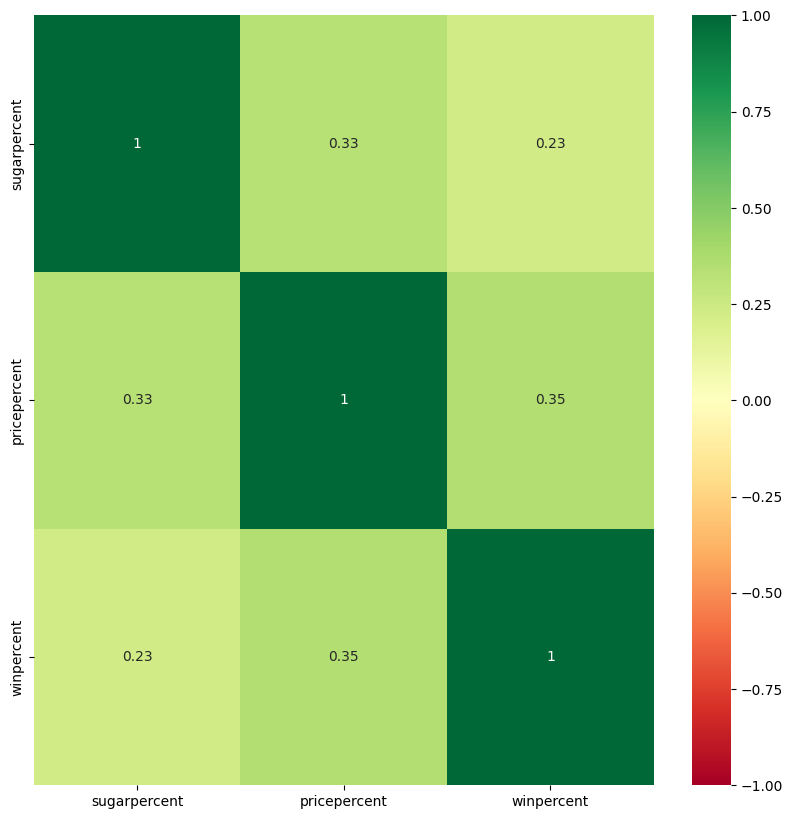

In [7]:
plt.figure(figsize=(10,10))
p = sns.heatmap(new_table.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

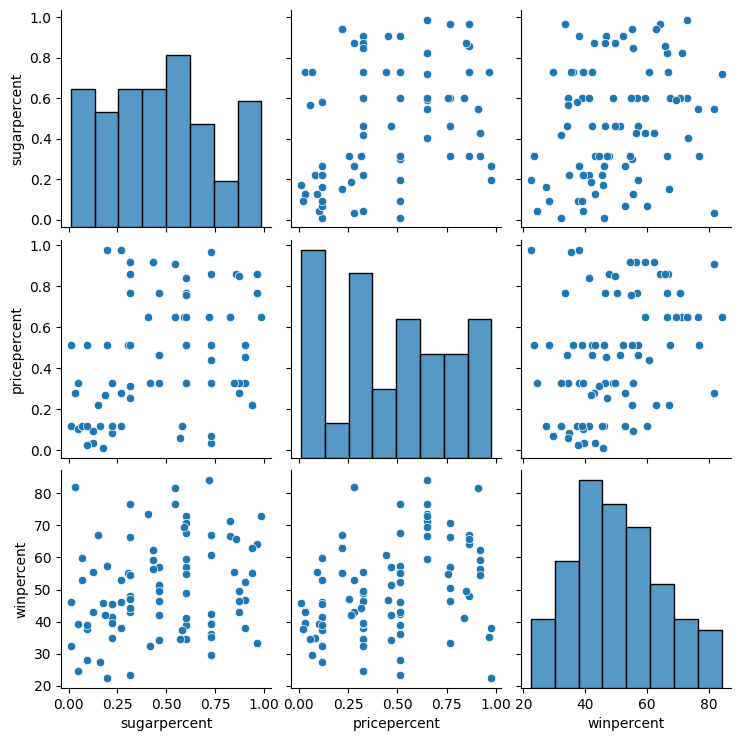

In [8]:
sns.pairplot(new_table)

In [9]:
X = new_table['sugarpercent']
y = new_table['winpercent']
res = scipy.stats.linregress(X, y)
res

LinregressResult(slope=11.923863286810722, intercept=44.60944180753465, rvalue=0.22915065712800645, pvalue=0.034897896761698376, stderr=5.5596076890773345, intercept_stderr=3.0860859920175674)

In [10]:
X_simple = new_table['sugarpercent']
y = new_table['winpercent']
X_simple_constant = sm.add_constant(X_simple)

model = sm.OLS(y, X_simple_constant)
res_simple = model.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     4.600
Date:                Thu, 12 Jan 2023   Prob (F-statistic):             0.0349
Time:                        22:52:47   Log-Likelihood:                -346.36
No. Observations:                  85   AIC:                             696.7
Df Residuals:                      83   BIC:                             701.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.6094      3.086     14.455   

In [11]:
X_mult = sm.add_constant(new_table.drop('winpercent', axis=1))
X_mult

,const,sugarpercent,pricepercent
0,1.0,0.732,0.860
1,1.0,0.604,0.511
2,1.0,0.011,0.116
3,1.0,0.011,0.511
4,1.0,0.906,0.511
...,...,...,...
80,1.0,0.220,0.116
81,1.0,0.093,0.116
82,1.0,0.313,0.313
83,1.0,0.186,0.267


In [12]:
model = sm.OLS(y, X_mult)
res_mult = model.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     6.353
Date:                Thu, 12 Jan 2023   Prob (F-statistic):            0.00272
Time:                        23:10:45   Log-Likelihood:                -342.53
No. Observations:                  85   AIC:                             691.1
Df Residuals:                      82   BIC:                             698.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7867      3.438     11.574   